In [2]:
from urllib.request import urlopen   
from urllib.error import URLError, HTTPError
import pandas as pd
import os
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x) # do not display exponents
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
movie_agg_df = pd.read_csv('imdb.agg.tsv', sep='\t', quotechar='"').set_index('tconst')
movie_agg_df.head(3)

,originalTitle,isAdult,startYear,runtimeMinutes,averageRating,numVotes,AR,AU,BR,CA,DE,DK,ES,FI,FR,GB,GR,HU,IN,IT,JP,MX,PL,PT,RU,SE,TR,US,XWG,XWW,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,Game-Show,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,actor_1,actor_2,director_1,director_2,writer_1,writer_2,weightedAvg_actor_1_attr,weightedAvg_actor_2_attr,weightedAvg_director_1_attr,weightedAvg_director_2_attr,weightedAvg_writer_1_attr,weightedAvg_writer_2_attr,Numvotes_actor_1_attr,Numvotes_actor_2_attr,Numvotes_director_1_attr,Numvotes_director_2_attr,Numvotes_writer_1_attr,Numvotes_writer_2_attr
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0002423,Madame DuBarry,0,1919,85.000,6.900,693.000,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm0417837,nm0509573,nm0523932,NaN,nm0266183,nm0473134,5.840,5.910,6.430,6.480,6.200,6.420,1011.000,1253.000,2381.000,1963.000,242.000,2048.000
tt0002445,Quo Vadis?,0,1913,120.000,6.200,235.000,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nm0637019,nm0784988,nm0345500,NaN,nm0797197,NaN,7.200,7.200,5.800,5.800,5.600,5.600,266.000,266.000,183.000,183.000,206.000,206.000
tt0002628,Der Andere,0,1913,48.000,5.700,62.000,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,nm0060168,nm0361518,nm0533048,NaN,nm0511317,nm1857018,7.200,7.200,5.800,5.800,5.600,5.600,266.000,266.000,183.000,183.000,206.000,206.000


In [5]:
modeling_colnames_exclude = ['originalTitle','actor_1','actor_2','director_1','director_2','writer_1','writer_2']
modeling_colnames = list(set(movie_agg_df.columns) - set(modeling_colnames_exclude))
modeling_df = movie_agg_df[modeling_colnames]
modeling_df.head()

,Numvotes_writer_1_attr,Comedy,RU,Family,Adult,Adventure,PT,weightedAvg_director_1_attr,War,HU,ES,Action,Biography,Horror,Fantasy,weightedAvg_director_2_attr,Game-Show,Romance,JP,News,Music,runtimeMinutes,weightedAvg_writer_2_attr,weightedAvg_actor_2_attr,Reality-TV,numVotes,Sport,Mystery,History,Film-Noir,Numvotes_director_1_attr,Numvotes_actor_2_attr,Musical,XWW,GR,TR,Western,Animation,Numvotes_writer_2_attr,FI,startYear,DK,BR,MX,Thriller,PL,weightedAvg_actor_1_attr,GB,Sci-Fi,US,IN,Short,FR,isAdult,averageRating,Documentary,weightedAvg_writer_1_attr,IT,AU,XWG,SE,Drama,Numvotes_director_2_attr,DE,Crime,CA,Talk-Show,Numvotes_actor_1_attr,AR
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0002423,242.000,0,1,0,0,0,0,6.430,0,1,0,0,1,0,0,6.480,0,0,0,0,0,85.000,6.420,5.910,0,693.000,0,0,0,0,2381.000,1253.000,0,0,0,0,0,0,2048.000,1,1919,1,1,0,0,1,5.840,0,0,1,0,0,1,0,6.900,0,6.200,0,0,0,1,1,1963.000,1,0,0,0,1011.000,0
tt0002445,206.000,0,1,0,0,0,0,5.800,0,1,0,0,0,0,0,5.800,0,0,0,0,0,120.000,5.600,7.200,0,235.000,0,0,1,0,183.000,266.000,0,0,0,0,0,0,206.000,0,1913,1,0,0,0,0,7.200,0,0,0,0,0,0,0,6.200,0,5.600,1,0,0,0,1,183.000,0,0,0,0,266.000,0
tt0002628,206.000,0,0,0,0,0,1,5.800,0,1,0,0,0,0,0,5.800,0,0,0,0,0,48.000,5.600,7.200,0,62.000,0,0,0,0,183.000,266.000,0,0,0,0,0,0,206.000,0,1913,1,0,0,1,0,7.200,0,0,0,0,0,0,0,5.700,0,5.600,0,0,0,0,1,183.000,1,0,0,0,266.000,0
tt0002646,206.000,0,1,0,0,0,0,5.480,0,1,0,0,0,0,0,5.480,0,0,0,0,0,121.000,5.600,7.200,0,304.000,0,0,0,0,156.000,266.000,0,0,0,0,0,0,206.000,0,1913,1,0,0,0,0,7.200,0,0,0,0,0,0,0,6.800,0,5.600,0,0,0,0,1,156.000,1,0,0,0,266.000,0
tt0002767,206.000,0,0,0,0,0,0,5.800,0,1,0,0,0,0,0,5.800,0,0,0,0,0,69.000,5.600,7.200,0,35.000,0,0,1,0,183.000,266.000,0,0,0,0,0,0,206.000,0,1913,0,0,0,0,1,7.200,0,0,1,0,0,0,0,5.400,0,5.600,0,0,0,0,1,183.000,0,0,0,0,266.000,0


In [6]:
# noticing runtime of 14400 minutes (10 days) - this is an extreme outlier
runtime_cutoff = (modeling_df["runtimeMinutes"].quantile(0.999)) # remove top .1%
modeling_df = modeling_df[modeling_df["runtimeMinutes"] < runtime_cutoff]

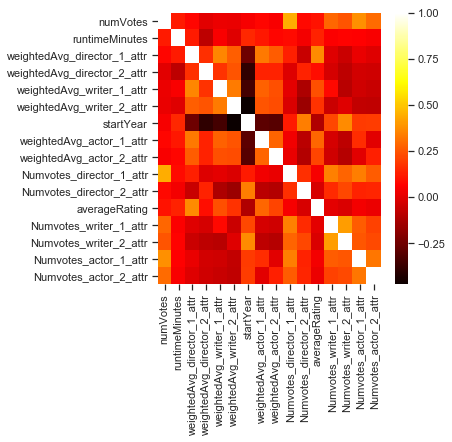

In [10]:
import seaborn as sns
corr = modeling_df[['numVotes','runtimeMinutes','weightedAvg_director_1_attr','weightedAvg_director_2_attr','weightedAvg_writer_1_attr','weightedAvg_writer_2_attr',
                    'startYear','weightedAvg_actor_1_attr','weightedAvg_actor_2_attr','Numvotes_director_1_attr','Numvotes_director_2_attr',
                   'averageRating','Numvotes_writer_1_attr','Numvotes_writer_2_attr','Numvotes_actor_1_attr','Numvotes_actor_2_attr']].corr()
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax,cmap='hot')

Text(0, 0.5, 'avgrating')

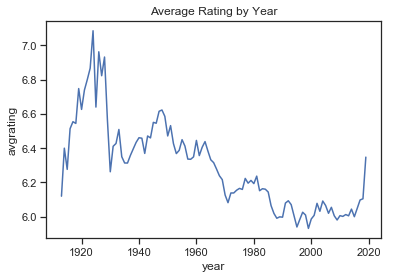

In [8]:
# average ratings seem to vary by movie year 
plt.plot(modeling_df.groupby('startYear')['averageRating'].mean())
plt.title('Average Rating by Year')
plt.xlabel('year')
plt.ylabel('avgrating')